<a href="https://colab.research.google.com/github/venuvardhan22/OIBSIP/blob/main/Level%201%20-%20Project%204/Twitter_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv("Twitter_Data.csv")

def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'@[A-Za-z0-9]+', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        return text
    else:
        return ''


df['clean_text'] = df['clean_text'].apply(clean_text)

# Tokenization
def tokenize(text):
    return word_tokenize(text.lower())

df['processed_text'] = df['clean_text'].apply(tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

df['processed_text'] = df['processed_text'].apply(remove_stopwords)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    return [lemmatizer.lemmatize(token, pos='v') for token in tokens]

df['processed_text'] = df['processed_text'].apply(lemmatize)

df['processed_text'] = df['processed_text'].apply(lambda x: ' '.join(x))

df.to_csv("preprocessed_twitter_comments.csv", index=False)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
new_data = pd.read_csv('preprocessed_twitter_comments.csv')
new_data

,clean_text,category,processed_text
0,when modi promised minimum government maximum ...,-1.0,modi promise minimum government maximum govern...
1,talk all the nonsense and continue all the dra...,0.0,talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcome bjp tell rahul main camp...
3,asking his supporters prefix chowkidar their n...,1.0,ask supporters prefix chowkidar name modi grea...
4,answer who among these the most powerful world...,1.0,answer among powerful world leader today trump...
...,...,...,...
162975,why these crores paid neerav modi not recover...,-1.0,crores pay neerav modi recover congress leader...
162976,dear rss terrorist payal gawar what about modi...,-1.0,dear rss terrorist payal gawar modi kill plus ...
162977,did you cover her interaction forum where she ...,0.0,cover interaction forum leave
162978,there big project came into india modi dream p...,0.0,big project come india modi dream project happ...


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import joblib

df = pd.read_csv("preprocessed_twitter_comments.csv")
df = df.dropna()

X = df['processed_text']
y = df['category']

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

pipeline.fit(X, y)

def predict_sentiment(comment):
    predicted_sentiment = pipeline.predict([comment])
    return predicted_sentiment[0]

def main():
    while True:
        comment = input("Enter your comment (type 'quit' to exit): ")
        if comment.lower() == 'quit':
            break
        sentiment = predict_sentiment(comment)
        if sentiment == 1:
            print("Positive sentiment")
        elif sentiment == 0:
            print("Neutral sentiment")
        elif sentiment == -1:
          print("Negative sentiment")

if __name__ == "__main__":
    main()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Enter your comment (type 'quit' to exit): hope tuthukudi people would prefer honest well behaved nationalist courageous likly minister modi cabinet vote benifit thuthukudi 
Positive sentiment
Enter your comment (type 'quit' to exit): how such people are being made amazedn fear that frustation him may not result vote against sir waste ministerdisgrace entire modi cabinet 
Neutral sentiment
Enter your comment (type 'quit' to exit): this the new india modi trying build with these leaders his party why have live with these deplorable characters 
Positive sentiment
Enter your comment (type 'quit' to exit): why not ask them vote for modern india modi why let even single vote waste make nda stronger centre nota
Positive sentiment
Enter your comment (type 'quit' to exit): vote for educated decent leaders dont for corrupt criminals yaar you always speak against 
Negative sentiment
Enter your comment (type 'quit' to exit): quit


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("preprocessed_twitter_comments.csv")
df = df.dropna()

X = df['processed_text']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.861106847969551


In [ ]:
pip install tensorflow

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have a DataFrame 'df' with columns 'text' and 'target'

# Text Preprocessing
def preprocess_text(text):
    # Implement your text preprocessing steps here
    # For example, you can remove punctuation, convert text to lowercase, etc.
    return text
df = pd.read_csv("preprocessed_twitter_comments.csv")
df = df.dropna()

X = df['processed_text']
y = df['category']

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['category'], test_size=0.2, random_state=42)

# Build the Feedforward Neural Network (FNN) model
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Build the Feedforward Neural Network (FNN) model
fnn_model = Sequential([
    Dense(16, input_shape=(X_train_dense.shape[1],), activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
fnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
fnn_model.fit(X_train_dense, y_train, epochs=3, batch_size=32, verbose=1)

# Evaluate the model on the test data
fnn_loss, fnn_accuracy = fnn_model.evaluate(X_test_dense, y_test, verbose=0)
print("FNN Accuracy:", fnn_accuracy)


Epoch 1/3
4073/4073 [==============================] - 10s 2ms/step - loss: -9.5396 - accuracy: 0.5372
Epoch 2/3
4073/4073 [==============================] - 9s 2ms/step - loss: -101.5890 - accuracy: 0.5652
Epoch 3/3
4073/4073 [==============================] - 9s 2ms/step - loss: -351.1569 - accuracy: 0.5659
FNN Accuracy: 0.5612204074859619


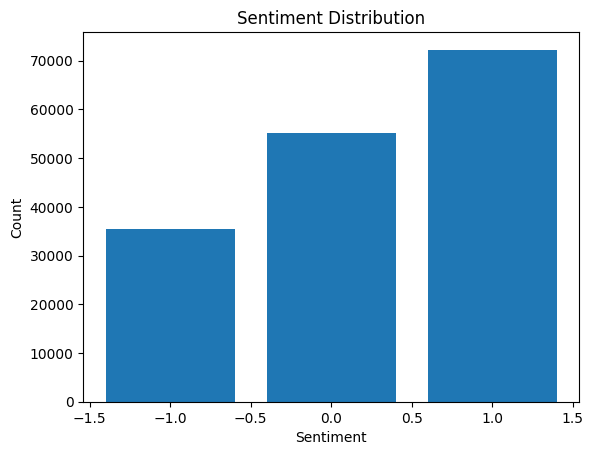

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("preprocessed_twitter_comments.csv")

sentiment_counts = df['category'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
